In [26]:
#data_path_all is the Anndata object containing all cells
#data_path_meta is the Anndata object conta 
#assign_path is the metadata
#metacell_types_path gives the cell types of the metacells
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import metacells as mc
import scipy
import ptitprince as pt

data_path_all = '/home/labs/shlush/shared/runs_analysis/Metacells_Models/Nili_Human/data_July_2023/all_cells_fil2_500000_cdata_output_with_cell_type_exp_indiv_new.h5ad'
data_path_meta = '/home/labs/shlush/shared/runs_analysis/Metacells_Models/Nili_Human/data_July_2023/all_cells_fil2_500000_mdata_output_with_type_new.h5ad'
assign_path = '/home/labs/shlush/shared/runs_analysis/Metacells_Models/Nili_Human/cell_metadata'
metacell_types_path = '/home/labs/shlush/tomerlev/LOY/metacell_types-2023-03-16.csv'
all_cells = ad.read_h5ad(data_path_all)
metacells = ad.read_h5ad(data_path_meta)

#UMI benchmark. UMI>benchmark is kept
benchmark=-1

In [29]:
#find out cell type
cells_to_meta_df = pd.DataFrame()
cells_to_meta_df['cnames'] = all_cells.obs['cnames']
cells_to_meta_df['metacell'] = all_cells.obs['metacell']

metacell_label_df = pd.read_csv(metacell_types_path)
meta_type_dict = {}
for _, row in metacell_label_df.iterrows():
    meta_type_dict[row['metacell']] = row['cell_type']

cell_types = []
for _, row in cells_to_meta_df.iterrows():
    try:
        cell_types.append(meta_type_dict[row['metacell']])
    except:
        cell_types.append('unassigned')
cells_to_meta_df['cell_type'] = cell_types
cells_to_meta_df.tail()

cells_to_meta_df.to_csv("cells_to_type.csv", index=False)

,cnames,metacell
demux_07_12_20_1_AAACCCAAGGTGAGCT-1,demux_07_12_20_1_AAACCCAAGGTGAGCT-1,1171
demux_07_12_20_1_AAACCCAAGTGCCAGA-1,demux_07_12_20_1_AAACCCAAGTGCCAGA-1,78
demux_07_12_20_1_AAACCCACAACACAGG-1,demux_07_12_20_1_AAACCCACAACACAGG-1,1093
demux_07_12_20_1_AAACCCACACACACGC-1,demux_07_12_20_1_AAACCCACACACACGC-1,912
demux_07_12_20_1_AAACCCACACGGATCC-1,demux_07_12_20_1_AAACCCACACGGATCC-1,700


In [33]:
#input genes from a chromosome as a list into entries. Make sure to get rid of genes you don't want (in our case it was SLC25A6 and CD99)
#input gene "synonyms" (e.g. ACOD1 and IRG1)


all_cells_genes = all_cells.var_names
metacell_genes = metacells.var_names
meta_sm = metacells.X
ygenes1=['LOC124905300', 'PLCXD1', 'GTPBP6', 'LINC00685', 'PPP2R3B', 'LOC102724521', 'SHOX', 'CRLF2', 'CSF2RA', 'LOC124905238', 'MIR3690', 'IL3RA', 'LOC101928032', 'LOC105373102', 'LINC00106', 'ASMTL-AS1', 'ASMTL', 'P2RY8', 'AKAP17A', 'ASMT', 'LINC02968', 'LOC105379413', 'LOC107985677', 'DHRSX', 'LOC124905239', 'ZBED1', 'LOC101928092', 'MIR6089', 'CD99P1', 'LINC00102', 'XGY2', 'SRY', 'RPS4Y1', 'ZFY', 'ZFY-AS1', 'LINC00278', 'TGIF2LY', 'LOC105377227', 'MIR9985', 'PCDH11Y', 'TTTY23B', 'TSPY2', 'FAM197Y9', 'LINC00280', 'LOC107987353', 'TTTY1B', 'TTTY2B', 'TTTY21B', 'TTTY7', 'TTTY8B', 'AMELY', 'TBL1Y', 'PRKY', 'LOC107987338', 'TTTY16', 'LOC107987339', 'TTTY12', 'LOC105377229', 'LOC105377231', 'LOC105377232', 'LOC107987354', 'LINC00279', 'LOC107987340', 'TTTY18', 'LOC105377234', 'TTTY19', 'LOC105377235', 'TTTY11', 'LOC105379264', 'LOC105379265', 'LOC105379266', 'LOC105379267', 'RBMY1A3P', 'TTTY20', 'TSPY4', 'FAM197Y8', 'TSPY8', 'FAM197Y7', 'FAM197Y6', 'TSPY3', 'FAM197Y5', 'TSPY1', 'FAM197Y4', 'TSPY9', 'FAM197Y3', 'FAM197Y2', 'TSPY10', 'RBMY3AP', 'TTTY8', 'TTTY7B', 'TTTY21', 'TTTY2', 'TTTY1', 'LOC107987342', 'TTTY22', 'TTTY23', 'LOC105379273', 'LOC107987343', 'GYG2P1', 'LOC112268311', 'TTTY15', 'USP9Y', 'DDX3Y', 'LOC112268312', 'UTY', 'MIR12120', 'TMSB4Y', 'VCY', 'VCY1B', 'NLGN4Y', 'NLGN4Y-AS1', 'LOC107987355', 'LOC124900508', 'FAM41AY1', 'LOC105377217', 'FAM224B', 'LOC105377218', 'LOC124905302', 'XKRY', 'CDY2B', 'CDY2A', 'XKRY2', 'LOC124905303', 'LOC105377219', 'FAM224A', 'LOC105377220', 'FAM41AY2', 'LOC124905304', 'HSFY1', 'TTTY9B', 'TTTY9A', 'HSFY2', 'LOC124905305', 'LOC124905307', 'TTTY14', 'LOC124905306', 'BCORP1', 'LOC102723934', 'LOC105377223', 'TXLNGY', 'KDM5D', 'LOC105377224', 'TTTY10', 'EIF1AY', 'RPS4Y2', 'LOC105377225', 'LOC107987346', 'LOC107987347', 'PRORY', 'RBMY2EP', 'RBMY1B', 'RBMY1A1', 'TTTY13', 'LOC105377236', 'LOC105377237', 'RBMY1D', 'RBMY1E', 'LOC107987356', 'PRY2', 'LOC102725532', 'TTTY6B', 'RBMY1F', 'TTTY5', 'RBMY2FP', 'LOC100652931', 'RBMY1J', 'LOC101929148', 'TTTY6', 'PRY', 'LOC107987357', 'LOC107987348', 'TTTY17A', 'TTTY4', 'BPY2', 'LOC105377238', 'DAZ1', 'DAZ2', 'LOC105377239', 'LOC124900506', 'REREP1Y', 'LOC107987349', 'TTTY3B', 'CDY1B', 'GOLGA2P2Y', 'LOC107987350', 'TTTY17B', 'TTTY4B', 'BPY2B', 'LOC105377241', 'DAZ3', 'DAZ4', 'LOC105377242', 'BPY2C', 'TTTY4C', 'TTTY17C', 'SEPTIN14P23', 'GOLGA2P3Y', 'CSPG4P1Y', 'CDY1', 'TTTY3', 'LOC107987352', 'REREP2Y', 'LOC124900507', 'LOC105377244', 'SPRY3', 'VAMP7', 'IL9R', 'WASIR1', 'DDX11L16']
ygenes2=['PLCXD1', 'GTPBP6', 'LINC00685', 'PPP2R3B', 'SHOX', 'CRLF2', 'CSF2RA', 'MIR3690', 'IL3RA', 'LINC00106', 'ASMTL-AS1', 'ASMTL', 'P2RY8', 'AKAP17A', 'ASMT', 'DHRSX', 'ZBED1', 'MIR6089', 'CD99P1', 'LINC00102', 'XGY2', 'SRY', 'RPS4Y1', 'ZFY', 'ZFY-AS1', 'LINC00278', 'TGIF2LY', 'MIR9985', 'PCDH11Y', 'TTTY23B', 'TSPY2', 'FAM197Y9', 'LINC00280', 'TTTY1B', 'TTTY2B', 'TTTY21B', 'TTTY7', 'TTTY8B', 'AMELY', 'TBL1Y', 'PRKY', 'TTTY16', 'TTTY12', 'LINC00279', 'TTTY18', 'TTTY19', 'TTTY11', 'RBMY1A3P', 'TTTY20', 'TSPY4', 'FAM197Y8', 'TSPY8', 'FAM197Y7', 'FAM197Y6', 'TSPY3', 'FAM197Y5', 'TSPY1', 'FAM197Y4', 'TSPY9', 'FAM197Y3', 'FAM197Y2', 'TSPY10', 'RBMY3AP', 'TTTY8', 'TTTY7B', 'TTTY21', 'TTTY2', 'TTTY1', 'TTTY22', 'TTTY23', 'GYG2P1', 'TTTY15', 'USP9Y', 'DDX3Y', 'UTY', 'MIR12120', 'TMSB4Y', 'VCY', 'VCY1B', 'NLGN4Y', 'NLGN4Y-AS1', 'FAM41AY1', 'FAM224B', 'XKRY', 'CDY2B', 'CDY2A', 'XKRY2', 'FAM224A', 'FAM41AY2', 'HSFY1', 'TTTY9B', 'TTTY9A', 'HSFY2', 'TTTY14', 'BCORP1', 'TXLNGY', 'KDM5D', 'TTTY10', 'EIF1AY', 'RPS4Y2', 'PRORY', 'RBMY2EP', 'RBMY1B', 'RBMY1A1', 'TTTY13', 'RBMY1D', 'RBMY1E', 'PRY2', 'TTTY6B', 'RBMY1F', 'TTTY5', 'RBMY2FP', 'LOC100652931', 'RBMY1J', 'LOC101929148', 'TTTY6', 'PRY', 'TTTY17A', 'TTTY4', 'BPY2', 'DAZ1', 'DAZ2', 'TTTY3B', 'CDY1B', 'GOLGA2P2Y', 'TTTY17B', 'TTTY4B', 'BPY2B', 'DAZ3', 'DAZ4', 'BPY2C', 'TTTY4C', 'TTTY17C', 'SEPTIN14P23', 'GOLGA2P3Y', 'CSPG4P1Y', 'CDY1', 'TTTY3', 'SPRY3', 'VAMP7', 'IL9R', 'WASIR1', 'DDX11L16']
entries=(list(set(ygenes1)|set(ygenes2)))

synonyms = ["TSPY9P"]
og_chry_gene_names = set(entries)


not_included = set([])
included = set([])

#detect if chromsome genes are in the anndata gene list
#chry_gene_names is the y chromsome gene names in the anndata gene list
#subset_df is the dataframe containing gene expression of Y chromosome genes
for gene in og_chry_gene_names:
    if gene in all_cells_genes:
        included.add(gene)  # if y-chr gene, put in included
    else: not_included.add(gene) # else, not_included -- doesn't add not included synonyms

for gene in synonyms:
    if gene in all_cells_genes:
        included.add(gene)

chry_gene_names = included 

subset = all_cells[all_cells.obs_names,list(chry_gene_names)] # gives subset of anndata object including only "included" y-cgenes

subset_df = pd.DataFrame.sparse.from_spmatrix(subset.X, columns=subset.var_names)
subset_df.index = subset.obs_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.4', 'AL732372.1', 'OR4F29', 'AC114498.1',
       ...
       'PINX1', 'LINC01505', 'IGF2', 'HSPA14', 'EMG1', 'DIABLO', 'LINC02203',
       'COG8', 'SCO2', 'H2BFS'],
      dtype='object', length=33487)


In [41]:
#creating a DF with UMI and total UMi for each Y gene from every cell
cells_counts_df = subset_df

#adding all UMI's per Y gene, concat to different dataframe
umi_sum=list(cells_counts_df.sum())
umi_sum=pd.DataFrame(umi_sum)
umi_sum=umi_sum.transpose()


umi_sum.columns=cells_counts_df.columns
cells_counts_df=pd.concat([cells_counts_df,umi_sum])
new_names={0:"Total UMI"}
cells_counts_df=cells_counts_df.rename(index=new_names)

temp_df=subset_df
cells_expressed=[(temp_df[col]>0.0).sum() for col in temp_df.columns]
cells_expressed=pd.DataFrame(cells_expressed)
cells_expressed=cells_expressed.transpose()
cells_expressed.columns=cells_counts_df.columns
cells_counts_df=pd.concat([cells_counts_df,cells_expressed])

new_names={0:"Number of Cells Expressing Gene"}
cells_counts_df=cells_counts_df.rename(index=new_names)
#cells_counts_df contains the gene expression data for all Y genes and has two additional rows, Total UMI of y genes and number of cells expressing the y gene

   TBL1Y  PRY  ZFY-AS1  HSFY1  PPP2R3B  TTTY17B  TTTY2B  TTTY1   IL9R  TTTY8  \
0   19.0  0.0    129.0    0.0   6752.0      0.0     0.0    0.0  259.0    0.0   

   ...  HSFY2  CRLF2  NLGN4Y  TTTY3  TTTY4  TTTY10  SPRY3  ASMTL-AS1  TTTY6B  \
0  ...    4.0  244.0    61.0    0.0    0.0   417.0  690.0     1438.0     0.0   

   TTTY7  
0    0.0  

[1 rows x 112 columns]
                                     TBL1Y  PRY  ZFY-AS1  HSFY1  PPP2R3B  \
demux_07_12_20_1_AAACCCAAGGTGAGCT-1    0.0  0.0      0.0    0.0      0.0   
demux_07_12_20_1_AAACCCAAGTGCCAGA-1    0.0  0.0      0.0    0.0      1.0   
demux_07_12_20_1_AAACCCACAACACAGG-1    0.0  0.0      0.0    0.0      0.0   
demux_07_12_20_1_AAACCCACACACACGC-1    0.0  0.0      0.0    0.0      0.0   
demux_07_12_20_1_AAACCCACACGGATCC-1    0.0  0.0      0.0    0.0      0.0   
...                                    ...  ...      ...    ...      ...   
demux_11_04_21_2_TTTGTTGGTGACCGAA-1    0.0  0.0      0.0    0.0      0.0   
demux_11_04_21_2_TTTGTTG

In [74]:
#creating a DF with UMI and total UMi for each gene from every cell
alldf=pd.DataFrame.sparse.from_spmatrix(all_cells.X, columns=all_cells.var_names)
alldf.index = subset.obs_names
alldf1 = alldf
umi_sum1=list(alldf1.sum())
umi_sum1=pd.DataFrame(umi_sum1)
umi_sum1=umi_sum1.transpose()

umi_sum1.columns=alldf1.columns
alldf1=pd.concat([alldf1,umi_sum1])
new_names={0:"Total UMI"}
alldf1=alldf1.rename(index=new_names)

                                     MIR1302-2HG  FAM138A  OR4F5  AL627309.1  \
demux_07_12_20_1_AAACCCAAGGTGAGCT-1          0.0      0.0    0.0         0.0   
demux_07_12_20_1_AAACCCAAGTGCCAGA-1          0.0      0.0    0.0         0.0   
demux_07_12_20_1_AAACCCACAACACAGG-1          0.0      0.0    0.0         0.0   
demux_07_12_20_1_AAACCCACACACACGC-1          0.0      0.0    0.0         0.0   
demux_07_12_20_1_AAACCCACACGGATCC-1          0.0      0.0    0.0         0.0   
...                                          ...      ...    ...         ...   
demux_11_04_21_2_TTTGTTGGTGACCGAA-1          0.0      0.0    0.0         0.0   
demux_11_04_21_2_TTTGTTGTCACCCTGT-1          0.0      0.0    0.0         0.0   
demux_11_04_21_2_TTTGTTGTCAGACCTA-1          0.0      0.0    0.0         0.0   
demux_11_04_21_2_TTTGTTGTCAGGACAG-1          0.0      0.0    0.0         0.0   
demux_11_04_21_2_TTTGTTGTCTGAATGC-1          0.0      0.0    0.0         0.0   

                                     AL

In [93]:
#sexlist is list of sex for every cell, agelist is list for every age
#ydf is cells_counts_df but a column of Sex and Age for cells is added
#alldf1 is alldf but with Sex and Age with only Gene Expression
ydf=cells_counts_df
metadata_df = pd.read_csv(assign_path, sep=" ", header=0)
samplesex=metadata_df['sex']
sexlist=samplesex.to_list()
sexlist.append("Total UMI")
sexlist.append("Number of Cells Expressing Gene")
agelist=metadata_df['age'].to_list()
agelist.append("Total UMI")
agelist.append("Number of Cells Expressing Gene")
ydf["Sex"]=sexlist
ydf["Age"]=agelist
mydf=ydf[ydf["Sex"]=="male"]
fydf=ydf[ydf["Sex"]=="female"]
nydf=ydf[ydf["Sex"].isna()]
len(mydf.index.to_list())+len(fydf.index.to_list())+len(nydf.index.to_list())
sexlist1=sexlist
sexlist1.remove('Number of Cells Expressing Gene')

agelist1=agelist
agelist1.remove('Number of Cells Expressing Gene')
alldf1['Sex']=sexlist1
alldf1['Age']=agelist1
tempdf1=alldf1
tempdf1.drop('Sex', axis=1,inplace=True)
tempdf1.drop('Age', axis=1,inplace=True)

In [101]:
#list of total umis per cell
totalumis=scipy.sparse.csr_matrix.sum(all_cells.X,axis=1)

totalumis=totalumis.tolist()

umisum=[]
for i in range (0,360810):
    umisum.append(totalumis[i][0])
    
tempydf=ydf
yumisum=list(tempydf.sum(axis=1))

yumisum.pop()
yumisum.pop()

#Calculating Y Score
yscorelist=[]
for i in range (0,360810):
    if totalumis[i][0]==0:
        yscorelist.append(0)
    else:
        yscorelist.append(yumisum[i]/totalumis[i][0])
        
cellids=tempdf1.index.tolist()
cellids.pop()

[0.0014104372355430183,
 0.0008208495793145906,
 0.0023790642347343376,
 0.001990049751243781,
 0.0016011385874399574,
 0.0029060381013884403,
 0.0015553960277578367,
 0.003739094308267553,
 0.0016512549537648614,
 0.00259170653907496,
 0.00333555703802535,
 0.001367053998632946,
 0.002079542500649857,
 0.002564102564102564,
 0.002583979328165375,
 0.0009302325581395349,
 0.0031565656565656565,
 0.0012836970474967907,
 0.0015128593040847202,
 0.0006237006237006237,
 0.002171552660152009,
 0.0033594624860022394,
 0.0006157635467980296,
 0.0015026296018031556,
 0.0026208503203261502,
 0.001027221366204417,
 0.0014441381121176316,
 0.0013966480446927375,
 0.002586206896551724,
 0.0021248339973439574,
 0.0005654509471303364,
 0.0,
 0.002203182374541004,
 0.00210896309314587,
 0.003356509230400384,
 0.0010214504596527069,
 0.002589834898025251,
 0.001201923076923077,
 0.004264998578333807,
 0.0016268980477223427,
 0.0032516258129064533,
 0.001366742596810934,
 0.0012175324675324675,
 0.0022

Y score=Y chromsome UMIs/total chromosome UMIs in the cell

In [103]:
#return indices of cells to keep after filtering by UMI benchmark for every cell in keepindices
keepindices=[]
for i in range(0,len(totalumis)):
    if totalumis[i][0]>UMIbenchmark:
         keepindices.append(i)

#returns list of yscores of cells after filter in keepyscorelist
#returns list of cellids of cells after filter in keepcellids
keepyscorelist=[]
keepcellids=[]
for i in keepindices:
    keepyscorelist.append(yscorelist[i])
    keepcellids.append(cellids[i])

#yscoredf: Dataframe with each filtered cell and its Y score
yscoredf=pd.DataFrame(keepcellids,columns=["Cell ID"])
yscoredf['Y Score']=keepyscorelist

data = {
    'Cell ID': cellids,
    'Y Score': yscorelist
}

yscoredf = pd.DataFrame(data)

#csv of cell and Y score
yscoredf.to_csv("New Y Score.csv",float_format='%.100g',index=True)

In [110]:
#indices and list of sex of cells
sexlist1=samplesex.to_list()
agelist1=metadata_df['age'].to_list()
sexlist1.append("Total UMI")
agelist1.append("Total UMI")
alldf1['Sex']=sexlist1
alldf1['Age']=agelist1
sexlistonly=sexlist1
sexlistonly.pop()

maleindices=[]
femaleindices=[]
naindices=[]
for i in range (0,360810):
    if sexlistonly[i]=="male":
        maleindices.append(i)
    elif sexlistonly[i]=="female":
        femaleindices.append(i)
    else:
        naindices.append(i)

In [118]:
maleindices=list(set(maleindices).intersection(set(keepindices)))
femaleindices=list(set(femaleindices).intersection(set(keepindices)))
naindices=list(set(naindices).intersection(set(keepindices)))

In [120]:
#generate list of umis of male cells and list of umi of female cells. Do the same for Y-umis and then Y-scores
maleumis=[]
maleyumis=[]
maleyscores=[]
for i in maleindices:
    maleumis.append(umisum[i])
    maleyumis.append(yumisum[i])
    maleyscores.append(yscorelist[i])
femaleumis=[]
femaleyumis=[]
femaleyscores=[]
for i in femaleindices:
    femaleumis.append(umisum[i])
    femaleyumis.append(yumisum[i])
    femaleyscores.append(yscorelist[i])

In [132]:
sns.set_style("whitegrid")

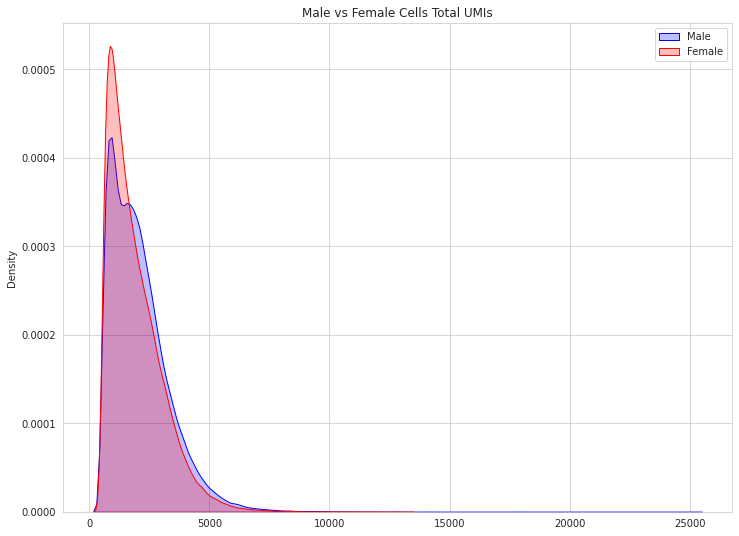

In [133]:
#Make density plot of male cell total UMIs compared to female cell total UMIs
fig, ax = plt.subplots(figsize=(12,9))
sns.kdeplot(np.array(maleumis), shade=True, color='blue', label='Male', ax=ax)
sns.kdeplot(np.array(femaleumis), shade=True, color='red', label='Female', ax=ax)
ax.legend()
ax.set_title('Male vs Female Cells Total UMIs')
plt.savefig('Male vs Female Cells Total UMIs.png')
plt.show()
plt.savefig('Male vs Female Total UMIs.png')

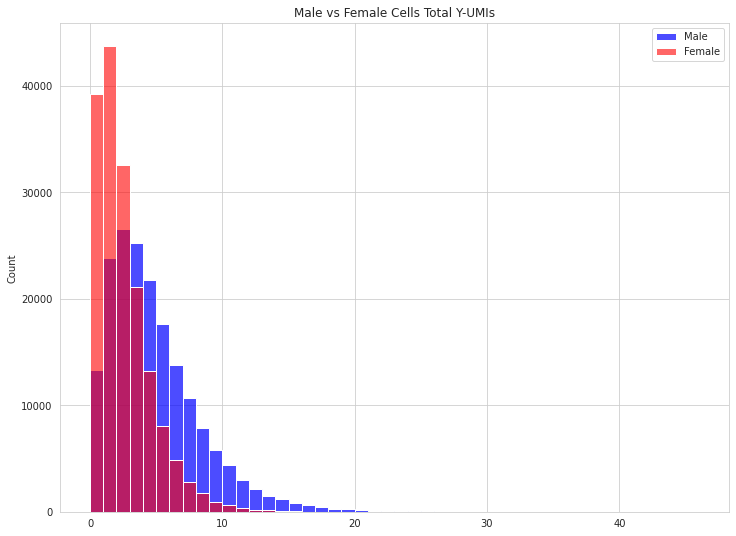

In [134]:
#Make histogram of male cell total Y-UMIs compared to female cell total Y-UMIs
fig, ax = plt.subplots(figsize=(12,9))
sns.histplot(np.array(maleyumis), bins=np.arange(min(np.array(maleyumis)), max(np.array(maleyumis)) + 1, 1), color='blue', alpha=0.7, label='Male', ax=ax)
sns.histplot(np.array(femaleyumis), bins=np.arange(min(np.array(femaleyumis)), max(np.array(femaleyumis)) + 1, 1), color='red', alpha=0.6, label='Female', ax=ax)
ax.legend()
ax.set_title('Male vs Female Cells Total Y-UMIs')
plt.savefig('Male vs Female Cells Total Y-UMIs.png')
plt.show()

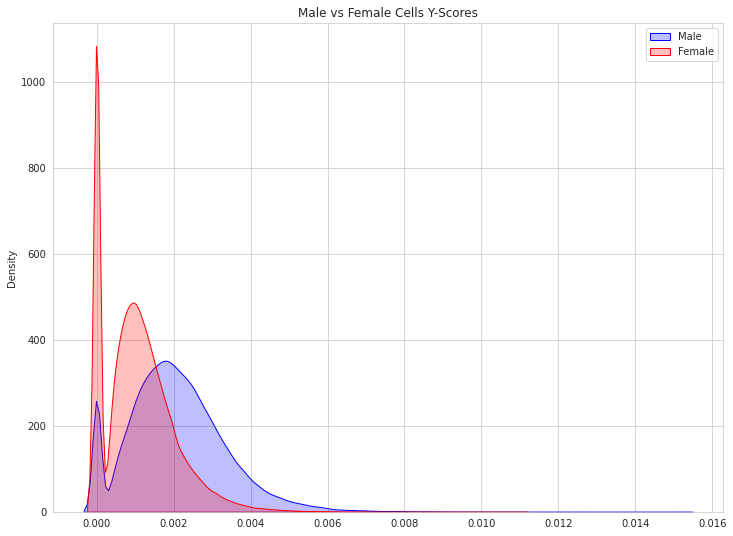

In [135]:
#Make density plot of male cell Y-Scores compared to female cell Y-Scores
fig, ax = plt.subplots(figsize=(12,9))
sns.kdeplot(np.array(maleyscores), shade=True, color='blue', label='Male', ax=ax)
sns.kdeplot(np.array(femaleyscores), shade=True, color='red', label='Female', ax=ax)
ax.legend()
ax.set_title('Male vs Female Cells Y-Scores')
plt.savefig('Male vs Female Cells Y-Scores.png')
plt.show()


In [137]:
#Generate Y-UMIs and Y-scores of cells for males and females
tempydf1=tempydf
yumisum1=tempydf1.sum(axis=1)
yumisum1=yumisum1.tolist()
maleyumis1=[]
for i in maleindices:
    maleyumis1.append(yumisum1[i])
femaleyumis1=[]
for i in femaleindices:
    femaleyumis1.append(yumisum1[i])
maleyscores1=[]
for i in maleindices:
    if umisum[i]==0:
        maleyscores1.append(0)
    else:
        maleyscores1.append(yumisum1[i]/umisum[i])
femaleyscores1=[]
for i in femaleindices:
    if umisum[i]==0:
        femaleyscores1.append(0)
    else:
        femaleyscores1.append(yumisum1[i]/umisum[i])


In [ ]:
#generate total umis per gene for male and female cells
maletotalumis=mydf.sum().tolist()
maletotalumis.pop()
maletotalumis.pop()
femaletotalumis=fydf.sum().tolist()#umis per gene for male
femaletotalumis.pop()
femaletotalumis.pop()

In [ ]:
ygenenames=fydf.columns.tolist()
ygenenames.pop()
ygenenames.pop()

In [ ]:
#generate bar graph that shows the total UMI for every Y gene
plt.figure(figsize=(25,10))
sns.barplot(x=ygenenames,y=femaletotalumis,color='blue')
plt.title('Total UMIs of Y Chromosome Genes Among Women')
plt.xlabel('Y Chromosome Genes')
plt.ylabel('Total UMIs')
plt.xticks(rotation='vertical')
plt.savefig('Total UMIs of Y Chromosome Genes Among Women')
plt.show()

In [ ]:
#generate 
agelist.pop()

In [ ]:
#generate dataframes of UMI, Y-UMI, and Y-Score with ages if nakes
agelist.pop()
maleages=[]
for i in maleindices:
    maleages.append(agelist[i])
    ageyumi=pd.DataFrame(maleages,columns=['Age'])
ageyumi['Y-UMI']=maleyumis
ageyumi1=pd.DataFrame(maleages,columns=['Age'])
ageyumi1['Y-UMI']=maleyumis1
ageumi=pd.DataFrame(maleages,columns=['Age'])
ageumi['UMI']=maleumis
ageyscore=pd.DataFrame(maleages,columns=['Age'])
ageyscore['Y-Score']=maleyscores
ageyscore1=pd.DataFrame(maleages,columns=['Age'])
ageyscore1['Y-Score']=maleyscores1

In [ ]:
ageyumidf1 = ageyumi1.groupby(['Age', 'Y-UMI']).size().reset_index(name='Count')#769

In [ ]:
ageyumi1.groupby(['Age', 'Y-UMI']).size().reset_index(name='Count')#769
ageumidf = ageumi.groupby(['Age', 'UMI']).size().reset_index(name='Count')#769
ageumidf = ageumi.groupby(['Age', 'UMI']).size().reset_index(name='Count')#769
ageyumidf = ageyumi.groupby(['Age', 'Y-UMI']).size().reset_index(name='Count')#769
ageyumidf1 = ageyumi1.groupby(['Age', 'Y-UMI']).size().reset_index(name='Count')#769
ageyscoredf = ageyscore.groupby(['Age', 'Y-Score']).size().reset_index(name='Count')#769
ageyscoredf1 = ageyscore1.groupby(['Age', 'Y-Score']).size().reset_index(name='Count')#769

In [ ]:
#Age vs Total Y-umi scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x=ageyumidf["Age"].values.flatten().tolist(), y=ageyumidf["Y-UMI"].values.flatten().tolist(), size=ageyumidf["Count"].values.flatten().tolist())
plt.title('Male Cells Ages vs Total Y-UMIs')
plt.xlabel('Age')
plt.ylabel('Y-UMIs')
plt.savefig('Male Cells Ages vs Total Y-UMIs.png')
plt.show()

In [ ]:
#Age vs Total Y-umi density plot
plt.figure(figsize=(10, 10))
sns.jointplot(x=ageumidf["Age"].values.flatten().tolist(), y=ageumidf["UMI"].values.flatten().tolist(),kind="kde",shade=True,height=12)
plt.title('Male Cells Ages vs Total UMIs')
plt.xlabel('Age')
plt.ylabel('UMIs')
plt.savefig('Male Cells Ages vs Total UMIs.png')
plt.show()

In [151]:
#Age vs Y-score density plot
plt.figure(figsize=(10, 10))
sns.jointplot(x=ageyscoredf["Age"].values.flatten().tolist(), y=ageyscoredf["Y-Score"].values.flatten().tolist(),kind="kde",shade=True,height=12)
plt.title('Male Cells Ages vs Y-Scores')
plt.xlabel('Age')
plt.ylabel('Y-Scores')
plt.savefig('Male Cells Ages vs Y-Scores.png')
plt.show()

NameError: name 'ageyscoredf' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:
#UMI vs Y-UMI scatterplot
plt.figure(figsize=(15,15))
plt.xlim(0, 10000)#axis limits
plt.ylim(0, 25)
sns.scatterplot(x=maleumis, y=maleyumis,alpha=0.005)
sns.scatterplot(x=femaleumis, y=femaleyumis,color="red",alpha=0.005)
plt.title('UMI vs Y-UMI')
plt.xlabel('UMI')
plt.ylabel('Y-UMI')
plt.savefig('Male Cells UMI vs Y-UMI Without Outliers.png')
plt.show()

In [170]:
data = {
    'Male UMIs': maleumis,
    'Male Y-UMIs': maleyumis

}
umiGraph_df = pd.DataFrame(data)
umiGraph_df.to_csv('UMI Graph DF.csv')

In [168]:
#Graph to create represent UMI vs Y-UMI using bars for various Y-UMIs
#Data
x = maleumis
y = maleyumis

#Bottom positions for each bar
bottom_positions = [0] * len(x)
for i in range(1, len(x)):
    bottom_positions[i] = bottom_positions[i-1] + y[i-1]
    
#Create the plot
fig, ax = plt.subplots()

#Plot the bars
ax.bar(x, y, bottom=bottom_positions)

plt.show()

KeyboardInterrupt: 